In [1]:
%matplotlib inline
import time
import numpy as np
import pylab as pl
import random
import pickle
from abm_estim_diffu_data import estimateABM

In [2]:
f = open("plot_trace.txt", 'rb')
result = pickle.load(f)
p0 = 0.01159
q0 = 0.06075

In [3]:
year = np.arange(1949, 1962)  # clothers dryers
s = [106, 319, 492, 635, 737, 890, 1397, 1523, 1294, 1240, 1425, 1260, 1236]

In [4]:
random.seed(999)
np.random.seed(999)

year = np.arange(1949, 1962)  # clothers dryers
s = [106, 319, 492, 635, 737, 890, 1397, 1523, 1294, 1240, 1425, 1260, 1236]
t1 = time.perf_counter()
est_abm = estimateABM(s, m_p=True)
p0, q0 = est_abm.gener_init_pq()
t2 = time.perf_counter()
print(f"第一阶段: {t2 - t1:.2f}秒")
print(f'    p0:{p0:.5f}, q0:{q0:.5f}')

result = est_abm.solution_search(p0, q0)
t3 = time.perf_counter()
print(f'第二阶段:: {t3 - t2:.2f}秒')
print(f'一共用时: {t3 - t1:.2f}秒')
print(f"R2:{result['fitness']:.4f}    num_nodes:{result['num_nodes']}")


Exceed the maximal iteration: 100
Exceed the maximal iteration: 100
Exceed the maximal iteration: 100
第一阶段: 82.67秒
    p0:0.01159, q0:0.06075
第1轮, 新增点个数:8
第2轮, 新增点个数:0
第二阶段:: 122.47秒
一共用时: 205.14秒
R2:0.9306    num_nodes:17


In [4]:
result.keys()

dict_keys(['params', 'fitness', 'best_curve', 'num_nodes', 'path', 'his_cond', 'his_data'])

In [ ]:
res_text = f"r^2={result['r2']:.4f}\n\hat{p}={result['params'][0]},"

In [5]:
print(f"Estimates:{result['params']}, r2:{result['fitness']}, number of nodes:{result['num_nodes']}")

Estimates:[0.01109, 0.06575, 16802.068493225623], r2:0.9306286127895119, number of nodes:17


In [88]:
help(ax.text)

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, withdash=False, **kwargs) method of matplotlib.axes._axes.Axes instance
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Parameters
    -

In [76]:
from matplotlib.ticker import ScalarFormatter

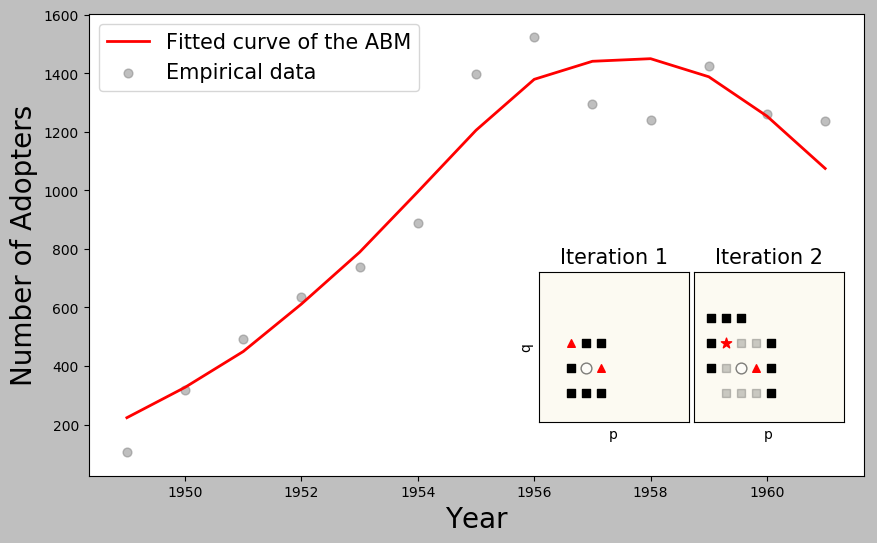

In [87]:
pl.style.use('grayscale')
fig = pl.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Number of Adopters', fontsize=20)
ax.plot(year, result['best_curve'], lw=2, color='red', label='Fitted curve of the ABM')
ax.scatter(year, s, c='grey', s=40, alpha=0.5, label='Empirical data')
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=True))
ax.text(1949, 1200, res_txt)
ax.grid(False)
ax.legend(loc='upper left', fontsize=15)

inset_ax1 = fig.add_axes([0.575, 0.2, 0.15, 0.25], facecolor='#FCFAF2')
inset_ax2 = fig.add_axes([0.73, 0.2, 0.15, 0.25], facecolor='#FCFAF2')
ax_list = [inset_ax1, inset_ax2]

for i in range(len(his_cond)):
    ax = ax_list[i]
    pq_set = set()
    for j in range(i+1):
        pq_set.update(result['path'][j])

    for z in pq_set:
        if z == (p0, q0):
            ax.scatter(z[0], z[1], s=60, c='w', edgecolors='k', marker='o', alpha=0.5)
        elif z in his_cond[i]:
            if z == best_solution and i == len(his_cond) - 1 :
                ax.scatter(z[0], z[1], s=60, c='r', marker='*')
            else:
                ax.scatter(z[0], z[1], s=30, c='r', marker='^', alpha=1)
        elif z in result['path'][i]:
            ax.scatter(z[0], z[1], s=30, c='k', marker='s', alpha=1)
        else:
            ax.scatter(z[0], z[1], s=30, c='k', marker='s', alpha=0.2)

    ax.set_xlim([0.01, 0.015])
    ax.set_ylim([0.05, 0.08])
    ax.set_title('Iteration %s' % (i+1), fontsize=15)
    ax.set_xlabel('p')
    if i == 0:
        ax.set_ylabel('q')
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
style_list = ['default', 'classic'] + sorted(
        style for style in pl.style.available if style != 'classic')
style_list

['default',
 'classic',
 'Solarize_Light2',
 '_classic_test',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']